In [32]:
import os
import pandas as pd
from newsapi.newsapi_client import NewsApiClient
from alpaca_trade_api.rest import REST, TimeFrame
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk as nltk
nltk.download('vader_lexicon')
import json
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from collections import Counter
nltk.download("stopwords")
#nltk.downlaod("punkt")
from dotenv import load_dotenv
lemmatizer = WordNetLemmatizer()
import datetime as dt
#!python -m spacy download en_core_web_sm
import spacy
from spacy import displacy


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\penti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Get third topic
#economy_headlines, _ = get_headlines("economy")

load_dotenv("key.env")
api_key = os.getenv("NEWS_API_KEY")
newsapi = NewsApiClient(api_key=api_key)


# /v2/everything
all_articles = newsapi.get_everything(q='bitcoin',
                                      sources='bbc-news,the-verge',
                                      domains='bbc.co.uk,techcrunch.com',
                                      from_param='2022-00-01',
                                      to='2022-04-01',
                                      language='en',
                                      sort_by='relevancy',
                                      page=2)

In [35]:
# Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

analyzer = SentimentIntensityAnalyzer()

for article in all_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sentiment_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sentiment_df = bitcoin_sentiment_df[cols]

bitcoin_sentiment_df.head()


,date,text,compound,positive,negative,neutral
0,2022-03-15,"Matt Mullenweg is the CEO of Automattic, the c...",0.0000,0.000,0.000,1.000
1,2022-03-22,Aparna Chennapragada is the chief product offi...,0.4215,0.076,0.000,0.924
2,2022-03-09,The first plan for crypto regulation across mu...,0.4588,0.121,0.000,0.879
3,2022-03-25,"You know what, I do think its nice that the Bo...",0.7800,0.186,0.034,0.779
4,2022-03-29,There’s no textbook-approved technique for bui...,0.4215,0.103,0.048,0.848


In [25]:
def sentiment_analysis():

    stocks_sentiments = []

    analyzer = SentimentIntensityAnalyzer()

    for article in all_articles["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            stocks_sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })

        except AttributeError:
            pass

    # Create DataFrame
    stocks_sentiment_df = pd.DataFrame(stocks_sentiments)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    stocks_sentiment_df = stocks_sentiment_df[cols]

    return stocks_sentiment_df.head()
    return bitcoin_sentiment_df.corr().style.background_gradient()

In [26]:
sentiment_analysis(all_articles)

TypeError: sentiment_analysis() takes 0 positional arguments but 1 was given

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [28]:
##generate a wordcloud funtion("I tried adding a bi-gram counter but i could not do it do to the datatypes"
def word_cloud_tokenizer(text):
    str_text = json.dumps(all_articles)
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str_text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    big_string = ' '.join(output)
    wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(big_string)
    plot = plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    return plot

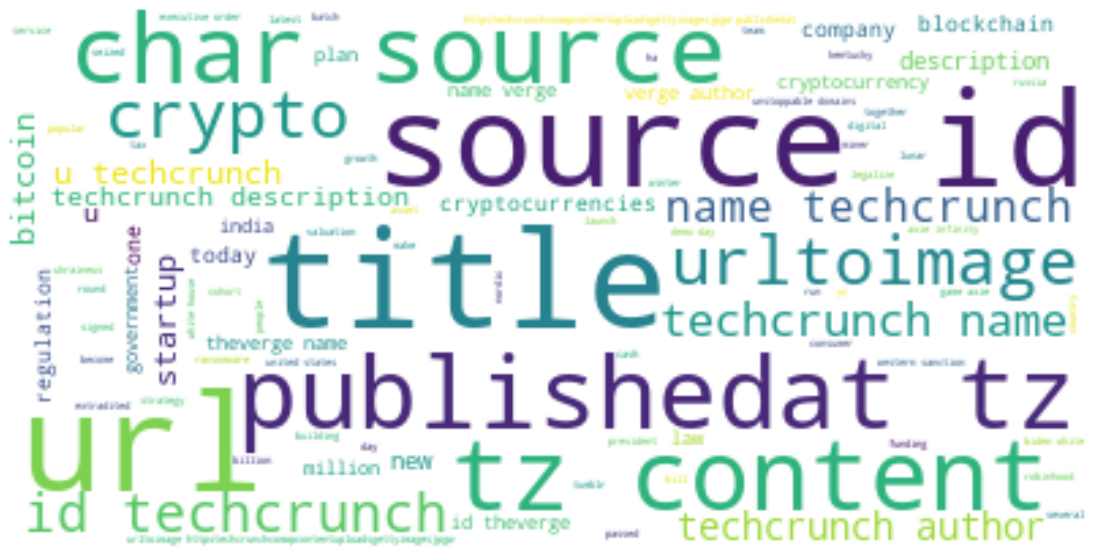

In [29]:
# Generate the Bitcoin word cloud

word_cloud_tokenizer(all_articles)

In [30]:
# Load the spaCy model

def most_commun_describers(text): 
    """making a funtion to get the a list of the most 
    comunt adjetive and plot a wordcloud of those words
    to easy visialisation
    as the input it takes a json files as the text""" 
    nlp = spacy.load('en_core_web_sm')
    all_bitcoin_sentences = json.dumps(text)
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', all_bitcoin_sentences)
    sw = set(stopwords.words('english'))
    new_bitcoin_tokens = nlp(re_clean)
    #displacy.render(new_bitcoin_tokens, style="ent")
    adjs = [token.text.lower() for token in new_bitcoin_tokens if token.pos_ == 'ADJ']
    most_freq_adjectives = Counter(adjs).most_common(50)
    #print(most_freq_adjectives)
    str_freq_adjs = json.dumps(most_freq_adjectives)
    wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str_freq_adjs)
    plot = plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    return plot

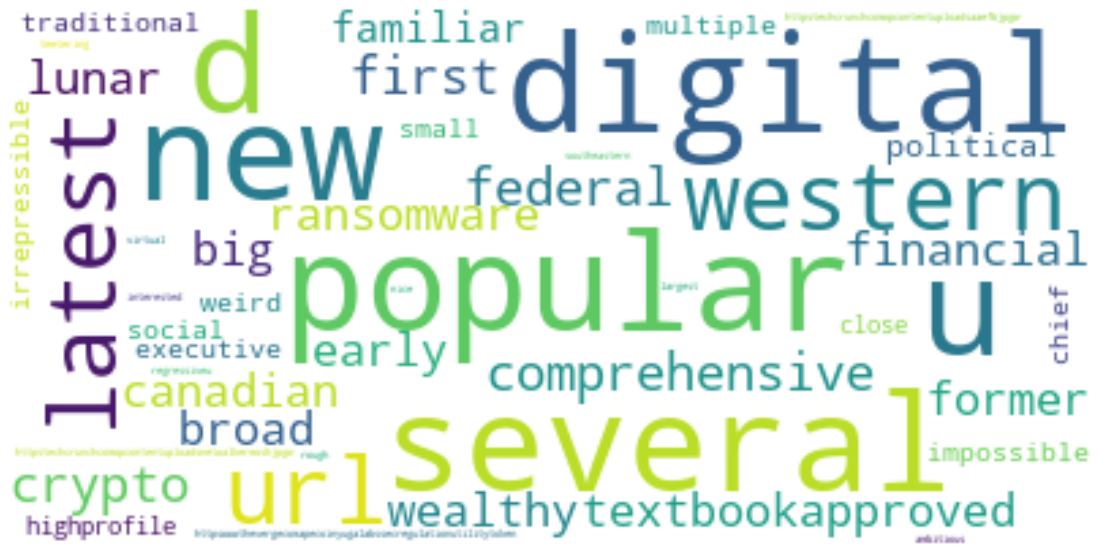

In [31]:
most_commun_describers(all_articles)